In [23]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
%matplotlib inline

# Modelling for resale flats pricing (Forecasting Price Movements)

In [7]:
path = "../data/resale_flats.csv"
df = pd.read_csv(path)

/var/folders/dq/33rpc0cx4f54t0vx2cdcgczr0000gn/T/ipykernel_3362/1281823852.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [27]:
df

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,_id,block,year,log_resale_price,diff_log_resale_price
0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,2017-01,61 years 04 months,1979,10 TO 12,1,406,2017,12.354493,NaN
1,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 4,250000.0,2017-01,60 years 07 months,1978,01 TO 03,2,108,2017,12.429216,0.074724
2,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,262000.0,2017-01,62 years 05 months,1980,01 TO 03,3,602,2017,12.476100,0.046884
3,ANG MO KIO,3 ROOM,New Generation,68.0,ANG MO KIO AVE 10,265000.0,2017-01,62 years 01 month,1980,04 TO 06,4,465,2017,12.487485,0.011385
4,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,265000.0,2017-01,62 years 05 months,1980,01 TO 03,5,601,2017,12.487485,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893732,YISHUN,EXECUTIVE,APARTMENT,142.0,YISHUN ST 61,456000.0,1999-12,NaN,1987,10 TO 12,287192,611,1999,13.030248,0.126041
893733,YISHUN,EXECUTIVE,APARTMENT,142.0,YISHUN CTRL,408000.0,1999-12,NaN,1988,01 TO 03,287193,324,1999,12.919022,-0.111226
893734,YISHUN,EXECUTIVE,MAISONETTE,146.0,YISHUN AVE 6,469000.0,1999-12,NaN,1988,07 TO 09,287194,392,1999,13.058358,0.139336
893735,YISHUN,EXECUTIVE,MAISONETTE,146.0,YISHUN RING RD,440000.0,1999-12,NaN,1988,04 TO 06,287195,356,1999,12.994530,-0.063828


## Hierarchical Time Series Modelling (Forecasting)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='month', ylabel='resale_price'>

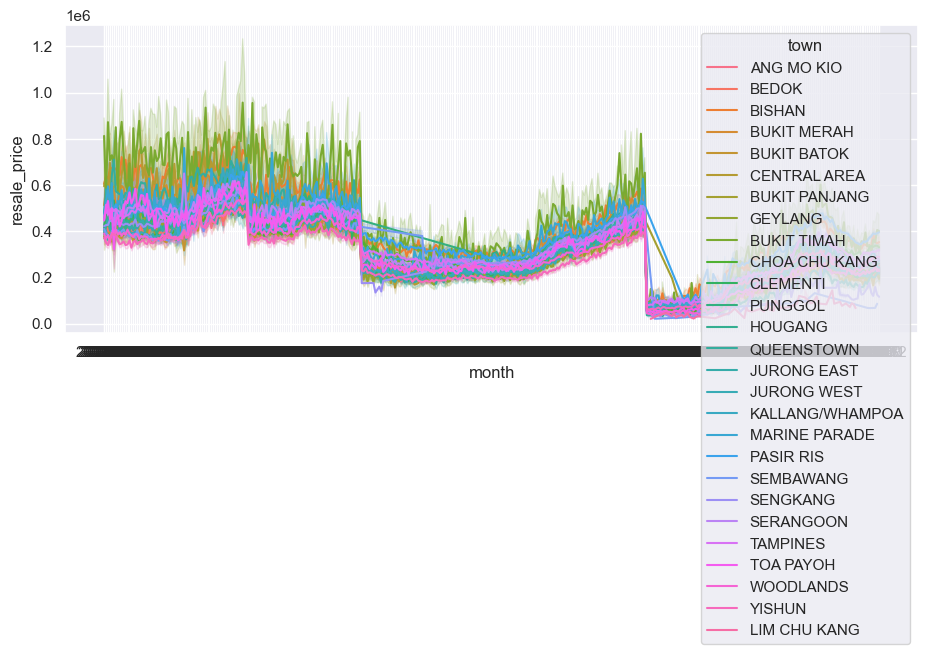

In [26]:
df['year'] = pd.DatetimeIndex(df['month']).year

# plot the time series df with seaborn 
plt.legend(bbox_to_anchor= (1.05, 1), loc='upper left', borderaxespad=0)

sns.set(rc = {'figure.figsize':(11, 4)})

sns.lineplot(x = "month", y = "resale_price", hue = "town", data = df)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='month', ylabel='diff_log_resale_price'>

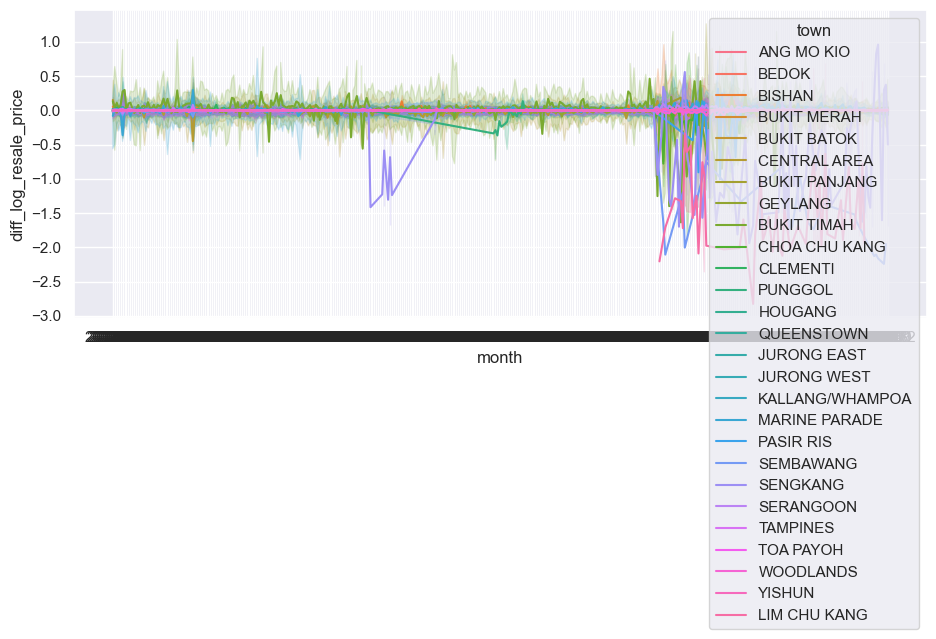

In [25]:
# apply diff log to the resale price 
df['log_resale_price'] = np.log(df['resale_price'])
df['diff_log_resale_price'] = df['log_resale_price'].diff()

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

# plot the time series df with seaborn
sns.set(rc = {'figure.figsize':(11, 4)})
sns.lineplot(x = "month", y = "diff_log_resale_price", hue = "town", data = df)
